In [1]:
import matplotlib.pyplot as plt
from atomtoolkit import ureg, Q_, util, IO
import atomtoolkit.render.lineshapes as lineshapes
from atomtoolkit.atom import Atom, Transition
import atomtoolkit.render.spectra as spectra
from atomtoolkit.render.grotrian import draw_levels
from pprint import pprint
import numpy as np

In [2]:
resource_path = 'C:/Users/jippi/PycharmProjects/Atom-Toolkit/resources'

def load_atom(species, num_levels=None, save=False, B=Q_(0.0, 'G'), load=False, **kwargs):
    if load:
        a = Atom.load(f'atoms/{species}.atom')
    else:
        df = IO.load_NIST_data(speciesdict[species]['species'])
        if 'trans_path' in speciesdict[species]:
            trans_df = IO.load_transition_data(speciesdict[species]['trans_path'], columns={
                "conf_l": "LConfiguration", "conf_u": "UConfiguration",
                "term_l": "LTerm", "term_u": "UTerm", "j_l": "LJ", "j_u": "UJ",
                "A": "A DREAM"}).dropna(subset=['A'])
        else:
            trans_df = None
        if 'allowed' not in kwargs:
            kwargs['allowed'] = (True, False, False)
        a = IO.generate_full_from_dataframe(df, species, speciesdict[species]['I'],
                                            num_levels=num_levels,
                                            B=B,
                                            hf_csv=f'{resource_path}/{species}_Hyperfine.csv',
                                            transitions_df=trans_df,
                                            allowed = kwargs['allowed'])
        if save:
            a.save(f'atoms/{species}.atom')
            a.generate_hf_csv(filename=f'{resource_path}/{species}_Hyperfine.csv')
        print('Generation complete')
    return a

In [3]:
speciesdict = {
    '171Yb': {'species': 'Yb II', 'I': 0.5, 'trans_path': f"{resource_path}/Yb_II_Oscillator_Strengths.csv"},
    '171Yb_2': {'species': 'Yb II', 'I': 0.5},
    '173Yb': {'species': 'Yb II', 'I': 2.5, 'trans_path': f"{resource_path}/Yb_II_Oscillator_Strengths.csv"},
    '138Ba': {'species': 'Ba II', 'I': 0.0},
    '133Ba': {'species': 'Ba II', 'I': 0.5},
    '201Hg': {'species': 'Hg I', 'I': 1.5},
    '9Be': {'species': 'Be II', 'I': 1.5}
}

In [14]:
# whether to load from pickle
load = False
# whether to save the ion
save = False
# Name of the atom
species = '171Yb'
# Number of levels to generate
num_levels = 70
# Magnetic field
B = Q_(5.0, 'G')

a = load_atom(species, load=load, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]
adding level 4f13.(2F*<7/2>).5d2.(3F) 5/2                                                                              
adding transition 4f13.(2F*<7/2>).6s.6p.(3P*<0>) (7/2,0)7/2 → 4f13.(2F*<7/2>).5d2.(3F) 3[9/2]*7/2                      
adding internal transitions to 4f13.(2F*<7/2>).5d2.(3F) 3[9/2]*11/2                                                    

Generation complete


In [40]:
# pprint(a.levels.list_names())

In [41]:
pprint(a.transitions.list_names())

[('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d2.(3F) 3[1/2]*1/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<5/2>).5d.6s.(1D) 1[1/2]*1/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<5/2>).5d.6s.(1D) 1[3/2]*3/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d2.(3F) 3[3/2]*1/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<5/2>).5d.6s.(3D) 3[5/2]*3/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<5/2>).5d.6s.(3D) 3[3/2]*1/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<5/2>).5d.6s.(3D) 3[1/2]*1/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d.6s.(1D) 1[3/2]*3/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2'),
 ('4f14.6s 2S1/2', '4f14.6p 2P*3/2'),
 ('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2'),
 ('4f14.6s 2S1/2', '4f14.6p 2P*1/2'),
 ('4f13.(2F*).6s2 2F*7/2', '4f13.(2F*<7/2>).6s.6p.(3P*<1>) (7/2,1)5/2'),
 ('4f13.(2F*).6s2 2F*7/2', '4f13.(2F*<7/2>).6s.6p.(3P*<1>) (7/2,1)9/2'),
 ('4f13.(2F*).6s2 2F*7/2', '4f13.(2F*<7/2>).6s.6p.(3P*<1>) (7/2,1)7/2'),
 ('4f13.(2F*).6s2 2F*7/2', '4f13.(2F*<

In [5]:
t = Transition(a.levels['4f14.6s 2S1/2'], a.levels['4f14.5d 2D5/2'], A=Q_(22, 'Hz'))
t.add_to_atom(a)
t.set_frequency(Q_(729.476090, 'THz'))

a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].set_frequency(Q_(320.570339, 'THz'))
a.transitions[('4f14.6s 2S1/2', '4f14.6p 2P*1/2')].set_frequency(Q_(812.128235, 'THz'))

In [31]:
# plt.figure(figsize=(20, 10))
# draw_levels(a)

In [8]:
a.compute_branching_ratios('4f14.6p 2P*3/2')

{'4f14.6s 2S1/2': 0.9876989869753979,
 '4f14.5d 2D3/2': 0.002098408104196816,
 '4f14.5d 2D5/2': 0.01020260492040521}

In [9]:
a.linked_levels('4f14.6p 2P*3/2')

{'4f14.6s 2S1/2': Transition(4f14.6s 2S1/2 → 4f14.6p 2P*3/2, freq=911136133580133.9 hertz, A=136500000.0 hertz,
 '4f13.(2F*<7/2>).6s.6p.(3P*<2>) (7/2,2)5/2': Transition(4f14.6p 2P*3/2 → 4f13.(2F*<7/2>).6s.6p.(3P*<2>) (7/2,2)5/2, freq=689904289199033.9 hertz, A=320000.0 hertz,
 '4f13.(2F*<7/2>).6s.6p.(3P*<2>) (7/2,2)3/2': Transition(4f14.6p 2P*3/2 → 4f13.(2F*<7/2>).6s.6p.(3P*<2>) (7/2,2)3/2, freq=675905480372724.1 hertz, A=610000.0 hertz,
 '4f14.5d 2D3/2': Transition(4f14.5d 2D3/2 → 4f14.6p 2P*3/2, freq=222788666615493.88 hertz, A=290000.0 hertz,
 '4f14.5d 2D5/2': Transition(4f14.5d 2D5/2 → 4f14.6p 2P*3/2, freq=181660043580133.88 hertz, A=1410000.0 hertz}

In [32]:
a.levels['4f13.(2F*).6s2 2F*7/2'].sublevels()

dict_values([HFLevel(name = 4f13.(2F*).6s2 2F*7/2 F=3, level=642115934728750.0 hertz, 7 sublevels), HFLevel(name = 4f13.(2F*).6s2 2F*7/2 F=4, level=642119554728750.0 hertz, 9 sublevels)])

In [47]:
a.transitions[('4f14.6s 2S1/2', '4f13.(2F*<7/2>).5d2.(3F) 3[3/2]*1/2')].A

80500000.0 <Unit('hertz')>

In [11]:
a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<5/2>).5d.6s.(3D) 1[1/2]*1/2')].

120000.0 <Unit('hertz')>

In [17]:
a.transitions[('4f14.5d 2D5/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2')].A

50000.0 <Unit('hertz')>

In [38]:
a.levels['4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2'].lande

1.44

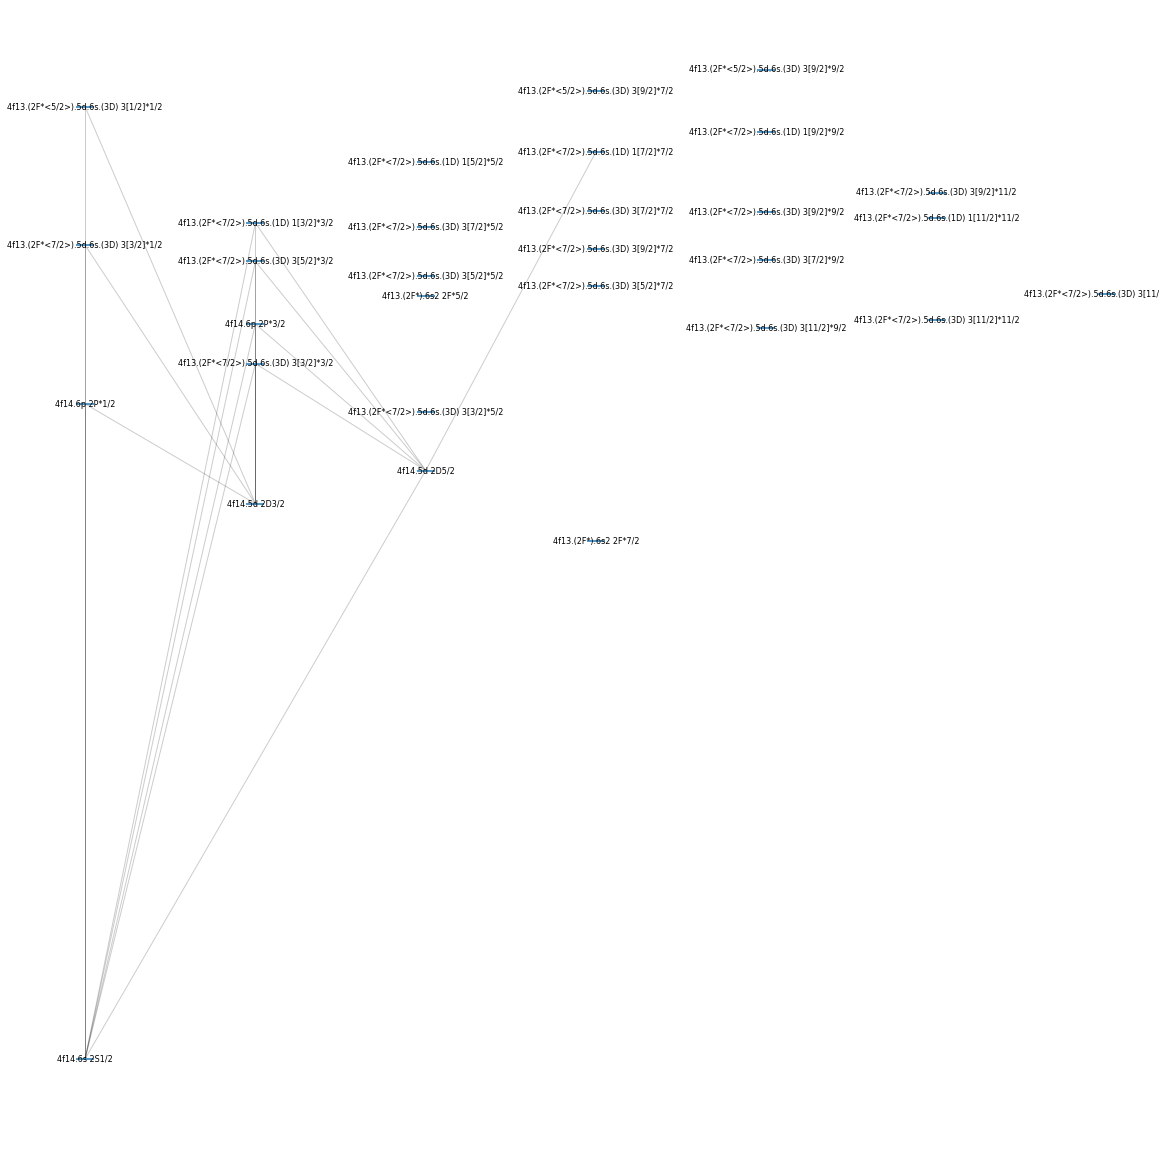

In [6]:
from atomtoolkit.render.grotrian import draw_levels
plt.figure(figsize=(16, 16))
draw_levels(a)
plt.show()

In [15]:
# whether to load from pickle
load = False
# whether to save the ion
save = False
# Name of the atom
species = '133Ba'
# Number of levels to generate
num_levels = 50
# Magnetic field
B = Q_(5.0, 'G')

a = load_atom(species, load=load, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.22it/s]
adding level 12d 2D5/2                                                                                                 
processing ΔJ=  0 transition 10f 2F*5/2 → 12d 2D5/2                                                                    
processing ΔJ=  1 transition 12d 2D5/2 → 10f 2F*7/2                                                                    
adding internal transitions to 12d 2D5/2                                                                               

Generation complete


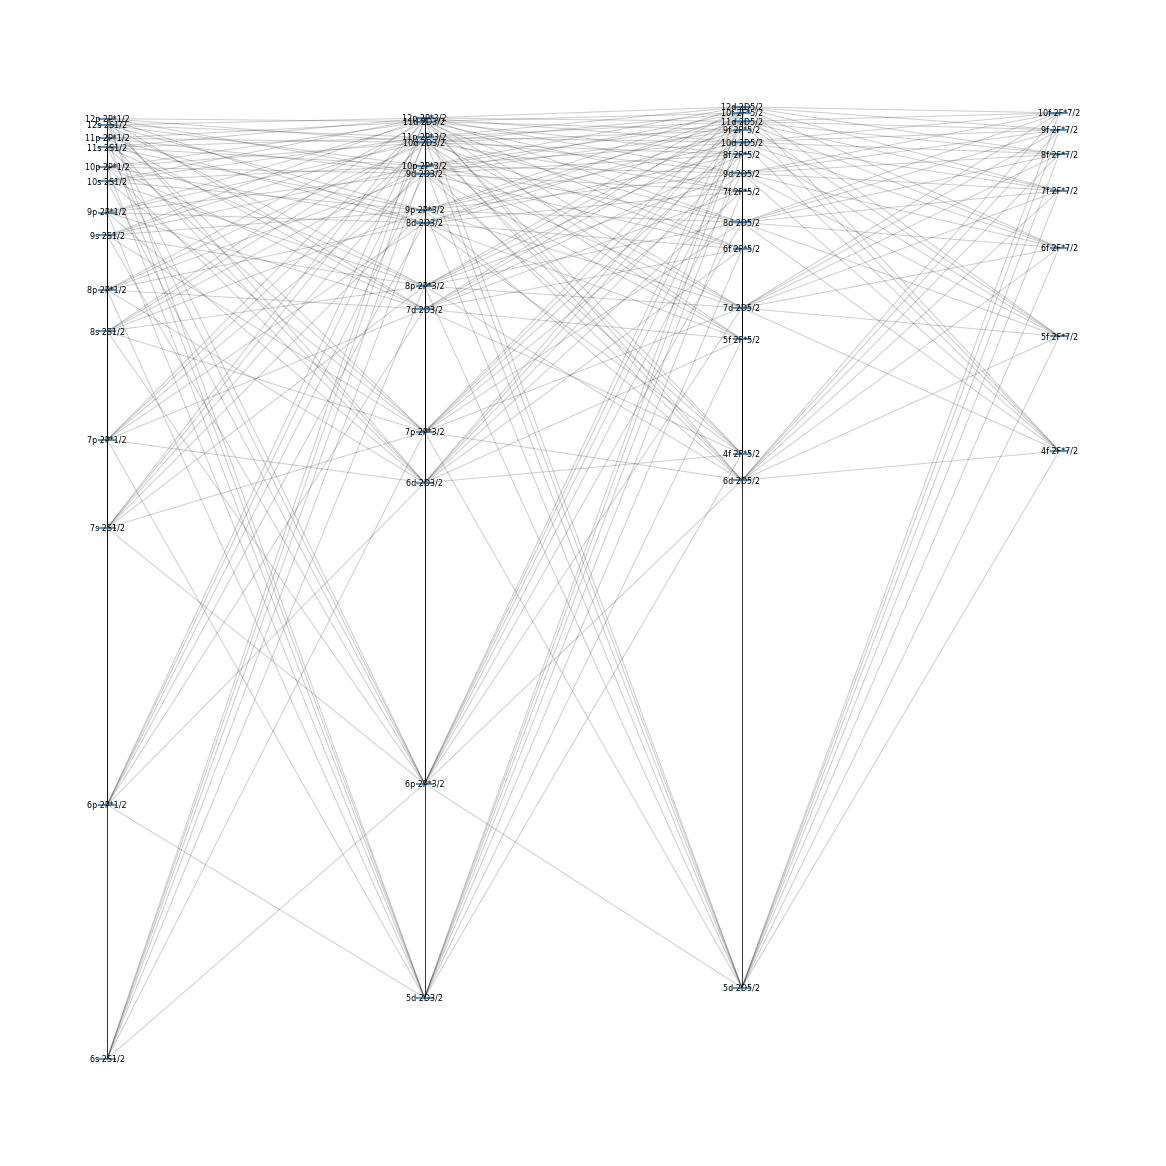

In [16]:
plt.figure(figsize=(16, 16))
draw_levels(b)
plt.show()

In [22]:
# whether to load from pickle
load = False
# whether to save the ion
save = False
# Name of the atom
species = '201Hg'
# Number of levels to generate
num_levels = 50
# Magnetic field
B = Q_(5.0, 'G')

c = load_atom(species, load=load, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14.91it/s]
adding level 5d10.6s.5g 3G5                                                                                            
processing ΔJ=  0 transition 5d10.6s.6f 3F*4 → 5d10.6s.5g 3G4                                                          
processing ΔJ=  1 transition 5d10.6s.6f 3F*4 → 5d10.6s.5g 3G5                                                          
adding internal transitions to 5d10.6s.5g 3G5                                                                          

Generation complete


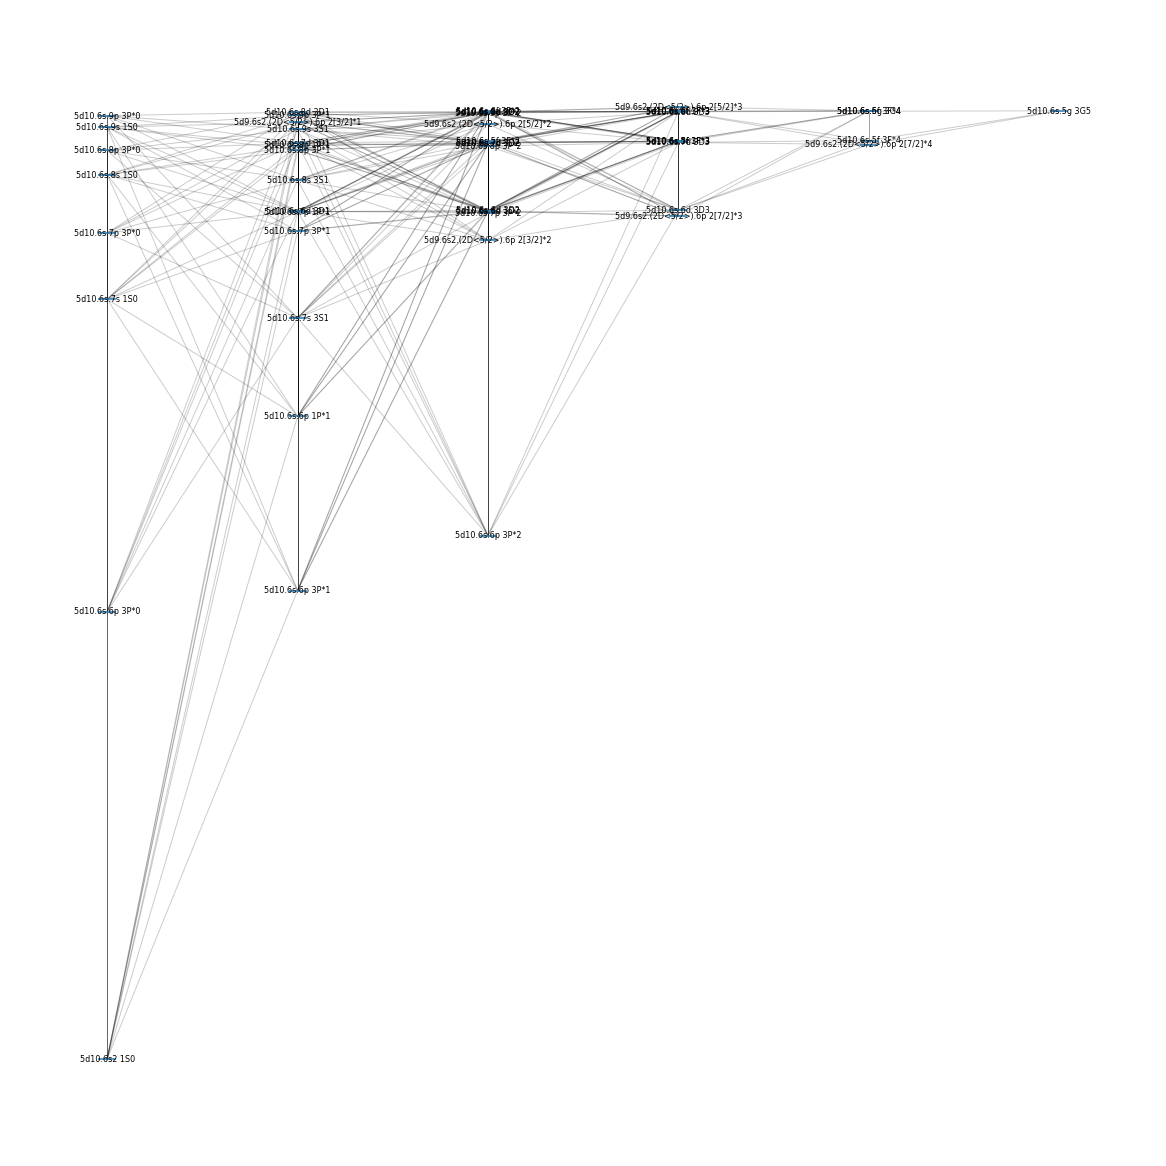

In [23]:
plt.figure(figsize=(16, 16))
draw_levels(c)
plt.show()

In [48]:
q = lambda x: x**2

In [50]:
q(2)

4